<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（交差確認法によるモデル選択）

サイン関数の多項式回帰

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

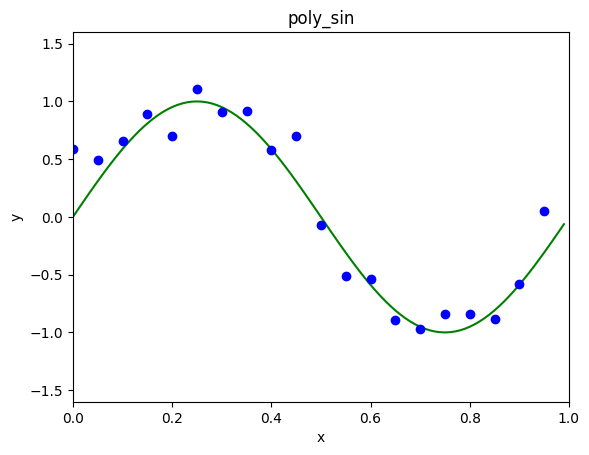

In [4]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo')
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 15 16 18] [ 4 14 17 19]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75
 0.8  0.9 ]
[ 0.58594295  0.49521235  0.65957713  0.88780448  1.10905886  0.90439173
  0.91859941  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268
 -0.89146159 -0.83637724 -0.84417242 -0.58024514]
W
 [0.16068294]


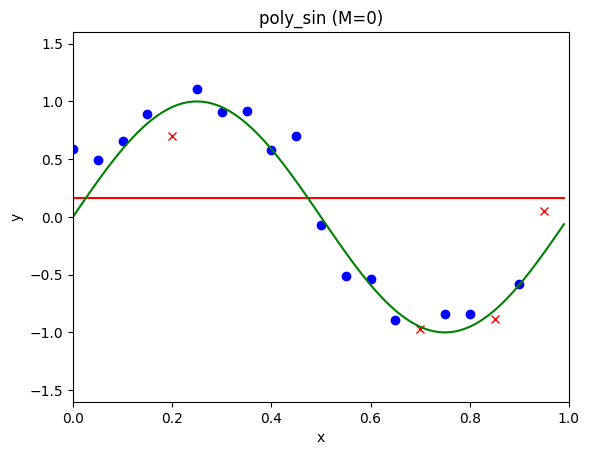

MSE= 0.6683506200718291
[ 0  1  2  4  5  6  7  8 10 12 13 14 15 17 18 19] [ 3  9 11 16]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.70252468  1.10905886  0.90439173
  0.91859941  0.57541203 -0.06880835 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [0.07715421]


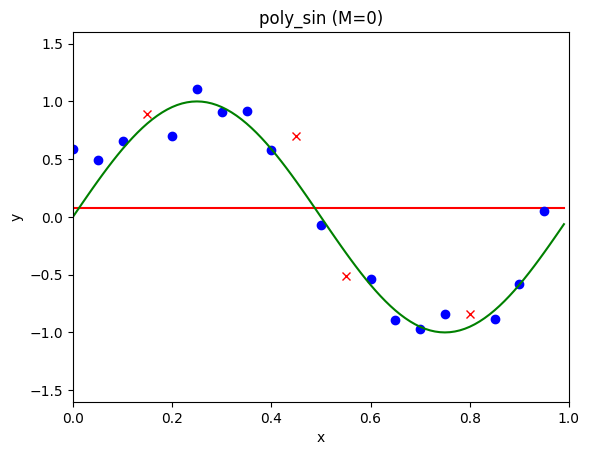

MSE= 0.5617234005075202
[ 1  2  3  4  5  6  8  9 11 12 13 14 16 17 18 19] [ 0  7 10 15]
[0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[ 0.49521235  0.65957713  0.88780448  0.70252468  1.10905886  0.90439173
  0.57541203  0.70330329 -0.51346776 -0.53384268 -0.89146159 -0.96941969
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [0.05428614]


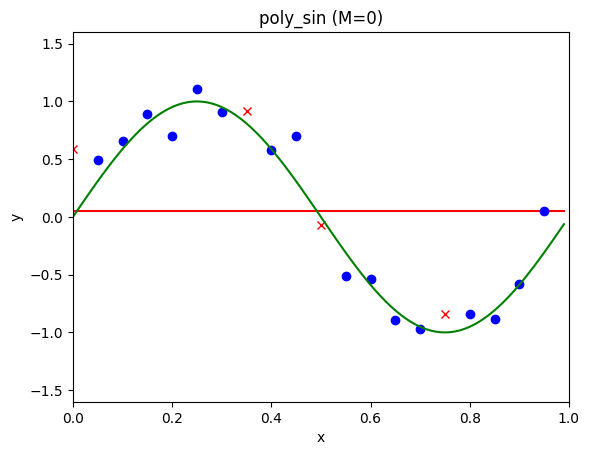

MSE= 0.4595324769929629
[ 0  1  2  3  4  5  7  9 10 11 12 14 15 16 17 19] [ 6  8 13 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.91859941  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.96941969
 -0.83637724 -0.84417242 -0.88324625  0.04714925]
W
 [0.09123988]


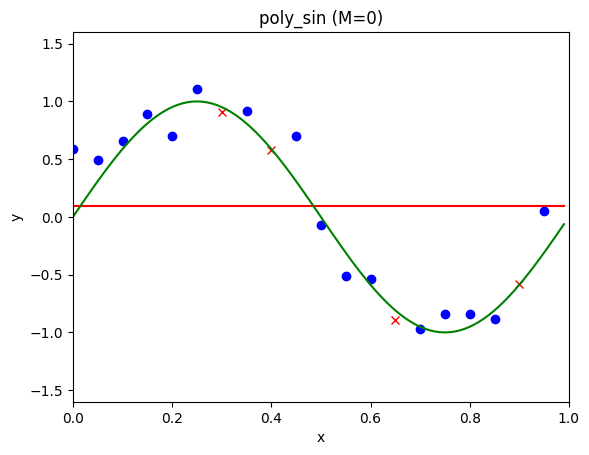

MSE= 0.5780582299490225
[ 0  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 1  2  5 12]
[0.   0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.88780448  0.70252468  0.90439173  0.91859941  0.57541203
  0.70330329 -0.06880835 -0.51346776 -0.89146159 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [-0.01637941]


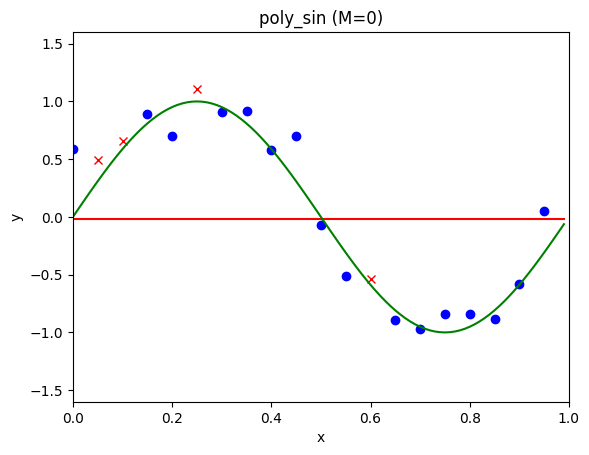

MSE= 0.5632557297025165
CV_MSE[0]=0.566184
[ 0  1  3  4  6  7  8  9 10 11 13 14 15 17 18 19] [ 2  5 12 16]
[0.   0.05 0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.88780448  0.70252468  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.89146159 -0.96941969
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [ 0.97037121 -1.86433873]


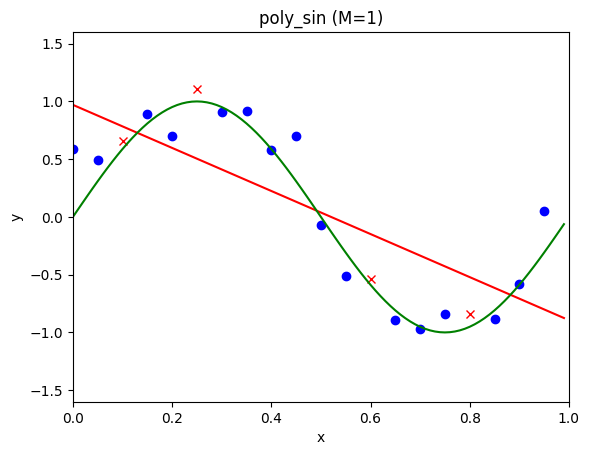

MSE= 0.15857163362177373
[ 0  1  2  3  4  5  6  7  8  9 12 13 16 17 18 19] [10 11 14 15]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.6  0.65 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.90439173  0.91859941  0.57541203  0.70330329 -0.53384268 -0.89146159
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 1.02723749 -1.79711311]


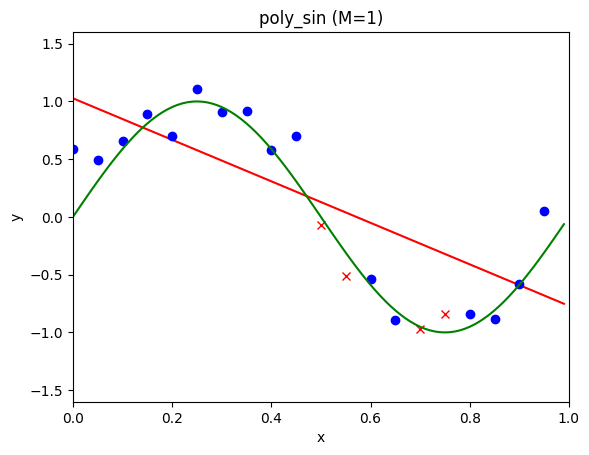

MSE= 0.2889259302374012
[ 0  1  2  3  4  5  7  9 10 11 12 14 15 16 17 18] [ 6  8 13 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.91859941  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.96941969
 -0.83637724 -0.84417242 -0.88324625 -0.58024514]
W
 [ 1.04012725 -2.19577672]


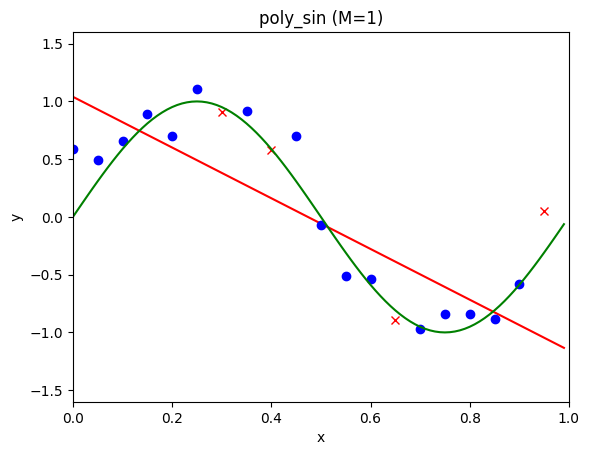

MSE= 0.47340273940709454
[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 19] [ 0  9 17 18]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.95]
[ 0.49521235  0.65957713  0.88780448  0.70252468  1.10905886  0.90439173
  0.91859941  0.57541203 -0.06880835 -0.51346776 -0.53384268 -0.89146159
 -0.96941969 -0.83637724 -0.84417242  0.04714925]
W
 [ 1.10513555 -2.19725871]


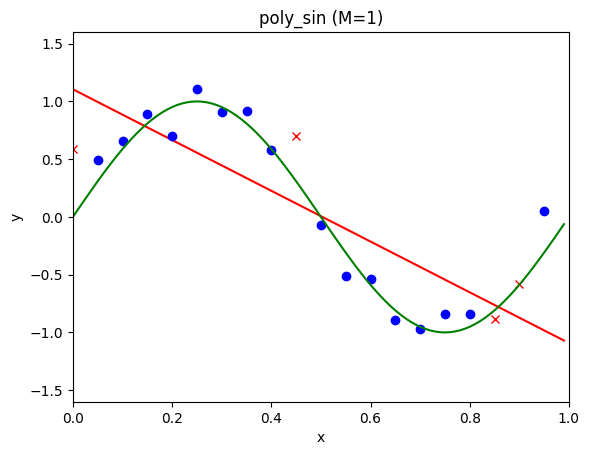

MSE= 0.1784942258657413
[ 0  2  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [1 3 4 7]
[0.   0.1  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.65957713  1.10905886  0.90439173  0.57541203  0.70330329
 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 1.00682419 -2.01661634]


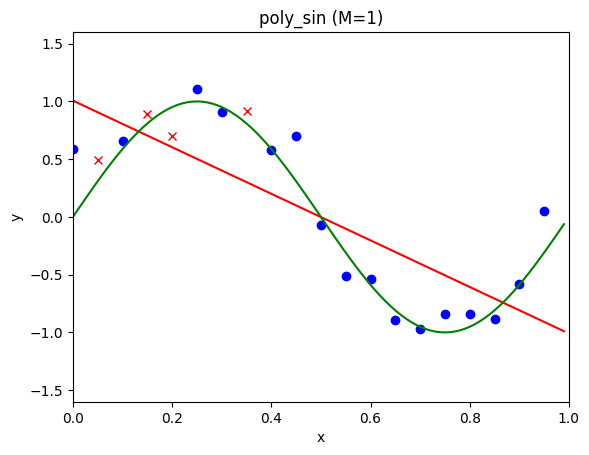

MSE= 0.14840689036038018
CV_MSE[1]=0.249560
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 17 18 19] [ 6 10 14 16]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.55 0.6  0.65 0.75 0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.91859941  0.57541203  0.70330329 -0.51346776 -0.53384268 -0.89146159
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [ 0.93788844 -1.63404787 -0.1689961 ]


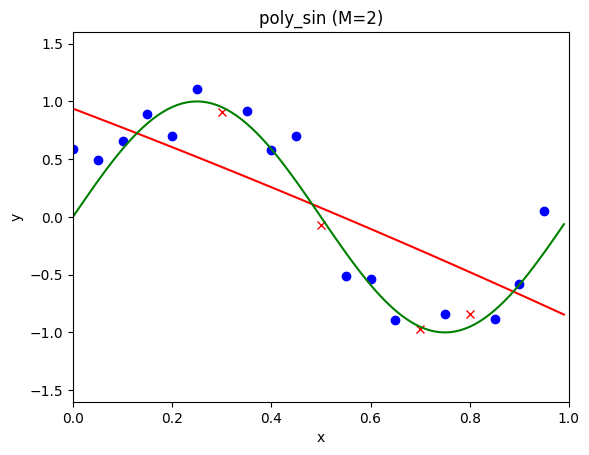

MSE= 0.21054984055545953
[ 0  1  2  3  4  5  6  7  8 10 12 13 14 15 16 19] [ 9 11 17 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.6  0.65 0.7  0.75
 0.8  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.90439173  0.91859941  0.57541203 -0.06880835 -0.53384268 -0.89146159
 -0.96941969 -0.83637724 -0.84417242  0.04714925]
W
 [ 0.99479045 -1.87853789 -0.11961945]


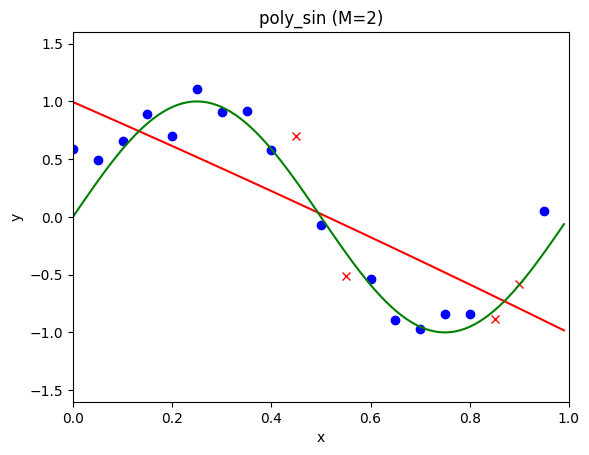

MSE= 0.1524822608606756
[ 1  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19] [ 0  2  3 15]
[0.05 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[ 0.49521235  0.70252468  1.10905886  0.90439173  0.91859941  0.57541203
  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.96941969
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 1.39210855 -3.31428904  1.08758203]


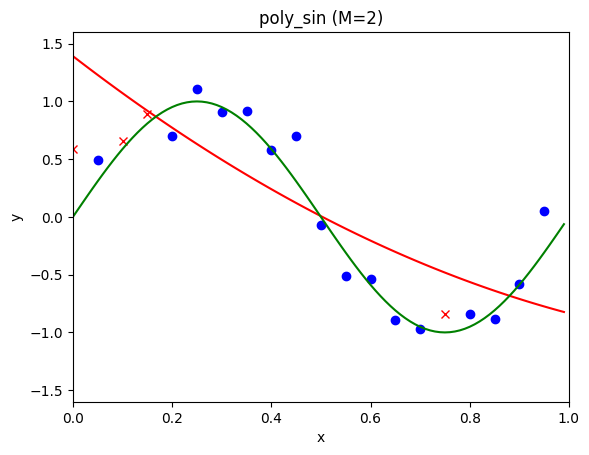

MSE= 0.23658098924199308
[ 0  1  2  3  4  6  8  9 10 11 13 14 15 16 17 18] [ 5  7 12 19]
[0.   0.05 0.1  0.15 0.2  0.3  0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  0.90439173
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.88324625 -0.58024514]
W
 [ 0.80245986 -0.69530476 -1.65032207]


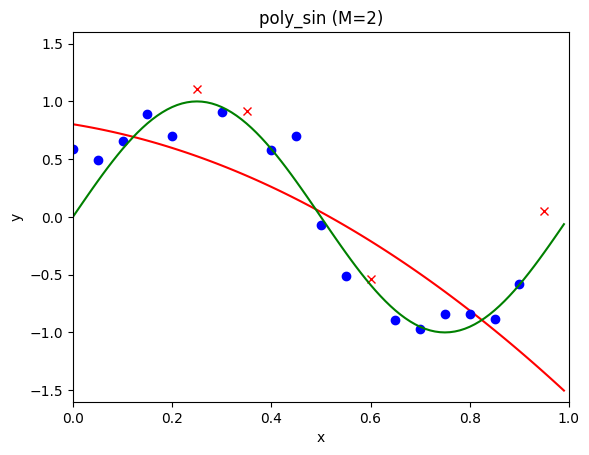

MSE= 0.676669486885657
[ 0  2  3  5  6  7  9 10 11 12 14 15 16 17 18 19] [ 1  4  8 13]
[0.   0.1  0.15 0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.65957713  0.88780448  1.10905886  0.90439173  0.91859941
  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 1.12238821 -2.27305762  0.22830786]


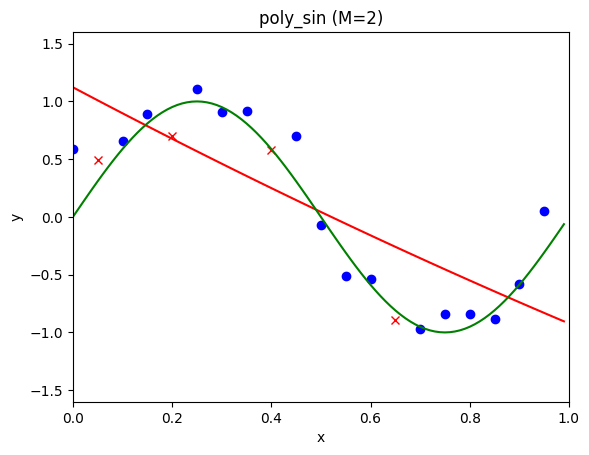

MSE= 0.19287618175202023
CV_MSE[2]=0.293832
[ 0  1  3  4  5  7  8  9 10 11 12 13 14 15 17 18] [ 2  6 16 19]
[0.   0.05 0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.9 ]
[ 0.58594295  0.49521235  0.88780448  0.70252468  1.10905886  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.89146159
 -0.96941969 -0.83637724 -0.88324625 -0.58024514]
W
 [  0.30882614   8.75343823 -28.72669526  19.78275233]


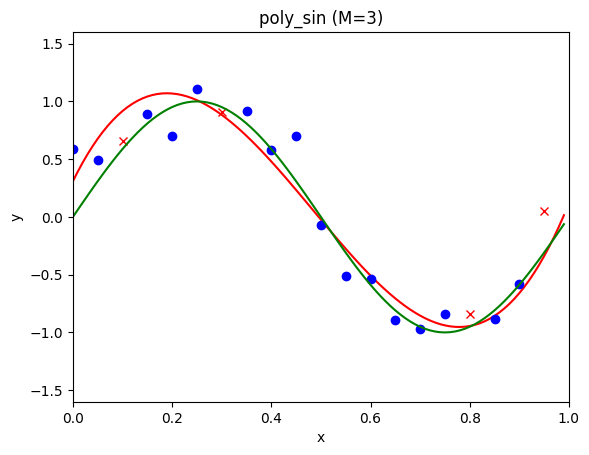

MSE= 0.05663640731560662
[ 1  2  3  4  6  7  8 10 11 12 13 15 16 17 18 19] [ 0  5  9 14]
[0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.49521235  0.65957713  0.88780448  0.70252468  0.90439173  0.91859941
  0.57541203 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ -0.14257746  11.8276284  -35.60966913  24.49594626]


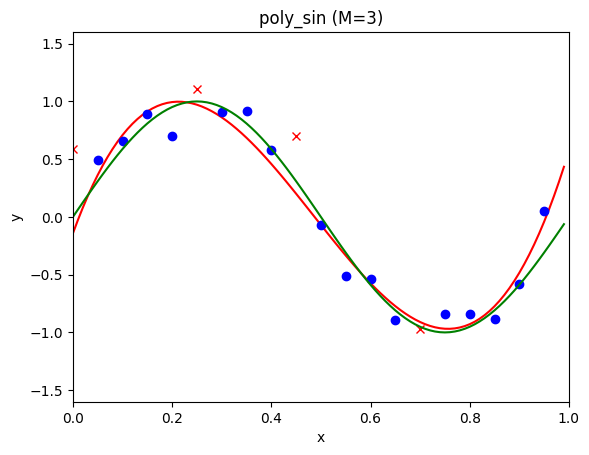

MSE= 0.2013589682907351
[ 0  1  2  3  4  5  6  8  9 10 11 13 14 16 17 19] [ 7 12 15 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.65 0.7  0.8
 0.85 0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.90439173  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.89146159
 -0.96941969 -0.84417242 -0.88324625  0.04714925]
W
 [  0.23853644   9.21187895 -30.38529873  21.39577583]


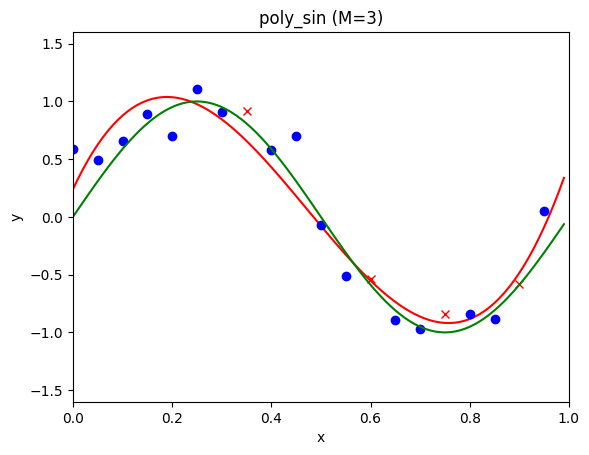

MSE= 0.02099221974458966
[ 0  1  2  3  5  6  7  8  9 12 13 14 15 16 18 19] [ 4 10 11 17]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  1.10905886  0.90439173
  0.91859941  0.57541203  0.70330329 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.58024514  0.04714925]
W
 [  0.22481907  10.0727142  -32.12254083  22.28710502]


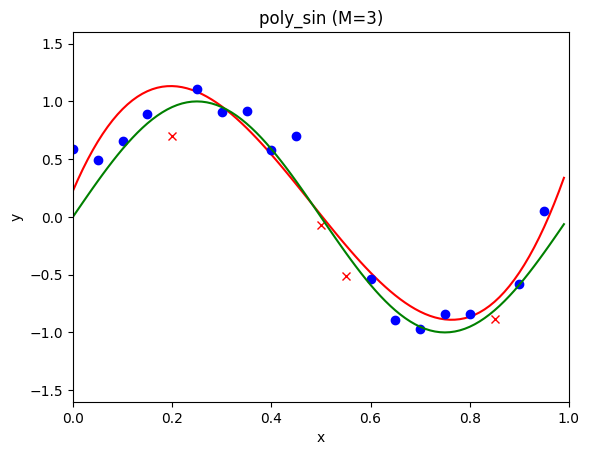

MSE= 0.07171830130883758
[ 0  2  4  5  6  7  9 10 11 12 14 15 16 17 18 19] [ 1  3  8 13]
[0.   0.1  0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.65957713  0.70252468  1.10905886  0.90439173  0.91859941
  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [  0.33380698   8.84941538 -29.56592983  20.78007218]


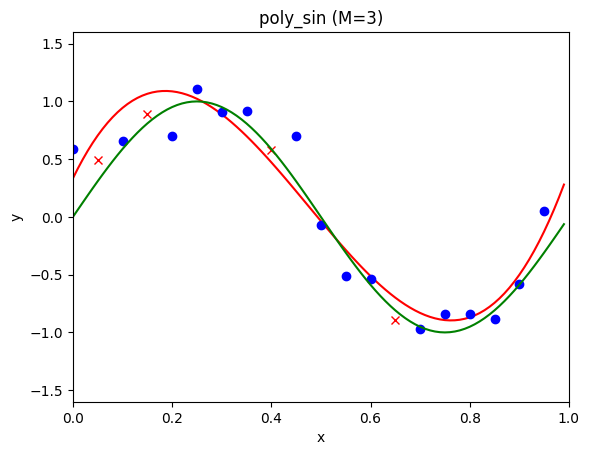

MSE= 0.03083729243330843
CV_MSE[3]=0.076309
[ 0  1  2  3  6  7  8  9 10 11 12 15 16 17 18 19] [ 4  5 13 14]
[0.   0.05 0.1  0.15 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [  0.43640717   4.04944555  -3.88085729 -22.5118978   22.80590298]


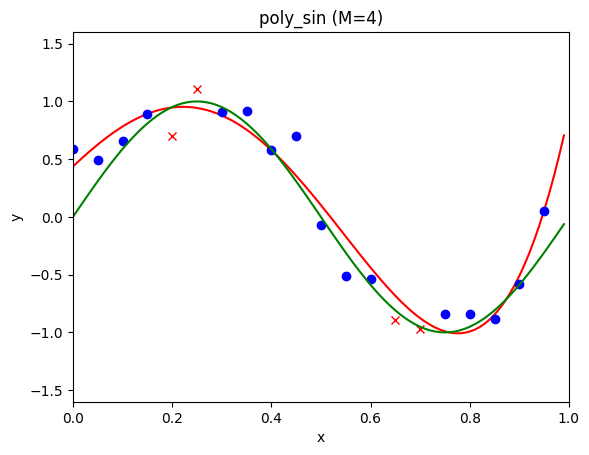

MSE= 0.03492676921188722
[ 2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 19] [ 0  1 10 18]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.65957713  0.88780448  0.70252468  1.10905886  0.90439173  0.91859941
  0.57541203  0.70330329 -0.51346776 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.88324625  0.04714925]
W
 [ -0.3694277   12.50987514 -31.14793647  11.53254276   8.32565127]


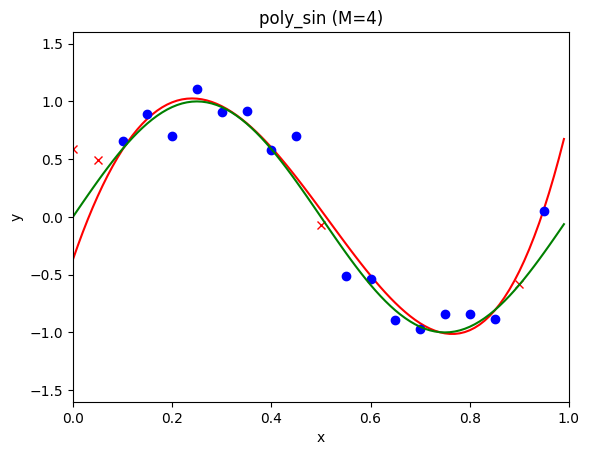

MSE= 0.26024945957353857
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 18] [ 7 15 17 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.8  0.9 ]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.90439173  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268
 -0.89146159 -0.96941969 -0.84417242 -0.58024514]
W
 [  0.46675764   2.63841377   4.19074335 -38.24155811  32.27215754]


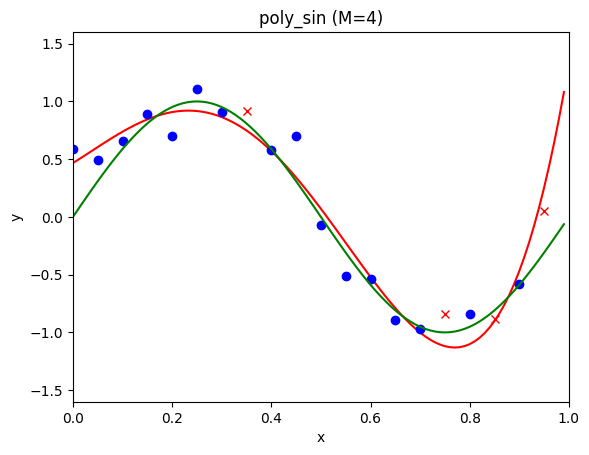

MSE= 0.03802226332654991
[ 0  1  2  3  4  5  7 10 11 13 14 15 16 17 18 19] [ 6  8  9 12]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.91859941 -0.06880835 -0.51346776 -0.89146159 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [  0.4285465    4.43245688  -7.98815252 -14.69165476  18.68574093]


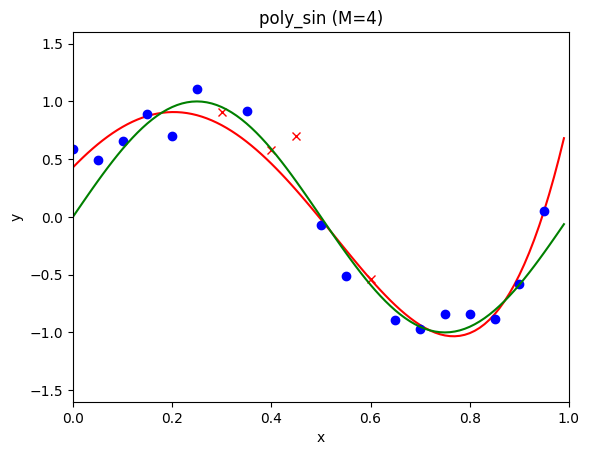

MSE= 0.061590779907986275
[ 0  1  4  5  6  7  8  9 10 12 13 14 15 17 18 19] [ 2  3 11 16]
[0.   0.05 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.70252468  1.10905886  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [  0.48269291   2.34631996   5.84601446 -39.85706925  32.26007569]


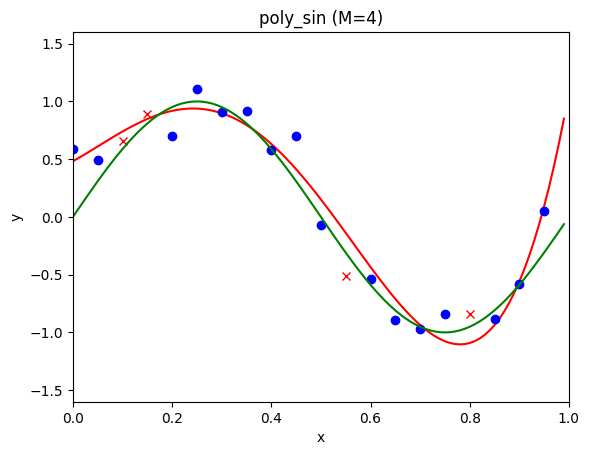

MSE= 0.05263387228995737
CV_MSE[4]=0.089485
[ 0  1  3  4  5  7  9 10 11 12 13 14 15 17 18 19] [ 2  6  8 16]
[0.   0.05 0.15 0.2  0.25 0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.88780448  0.70252468  1.10905886  0.91859941
  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [   0.57790282   -3.89275612   60.71686137 -206.17675593  236.40315692
  -87.23439518]


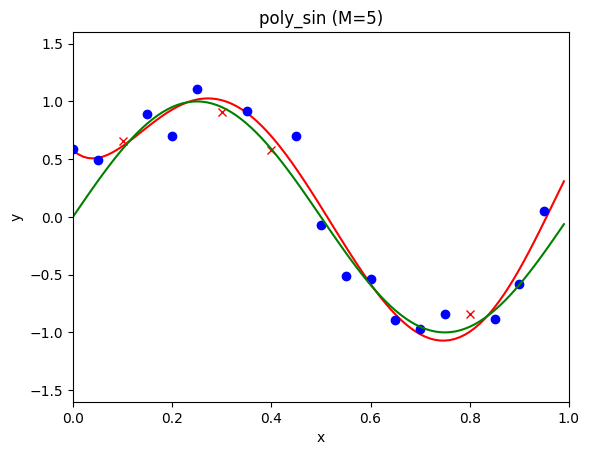

MSE= 0.01282056606611037
[ 0  2  3  4  6  7  8  9 10 11 13 14 16 17 18 19] [ 1  5 12 15]
[0.   0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.8  0.85
 0.9  0.95]
[ 0.58594295  0.65957713  0.88780448  0.70252468  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.89146159 -0.96941969
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [   0.60115069   -3.55970256   54.64552576 -186.46765918  212.49251757
  -77.2302528 ]


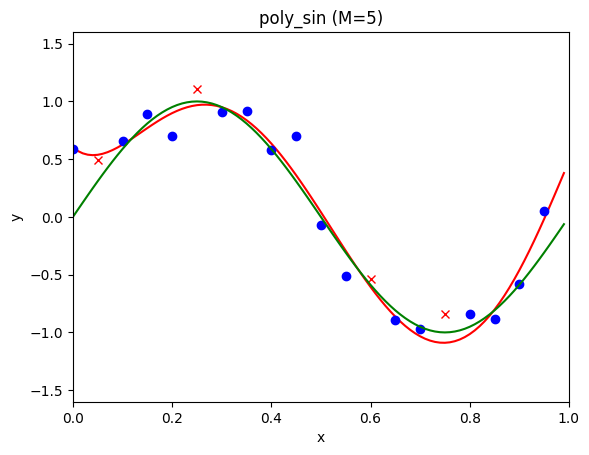

MSE= 0.022786458117300325
[ 0  1  2  3  4  5  6  8  9 10 12 14 15 16 18 19] [ 7 11 13 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.6  0.7  0.75 0.8
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.90439173  0.57541203  0.70330329 -0.06880835 -0.53384268 -0.96941969
 -0.83637724 -0.84417242 -0.58024514  0.04714925]
W
 [   0.57001321   -2.50940276   46.57729099 -162.9488853   186.02286698
  -67.27584319]


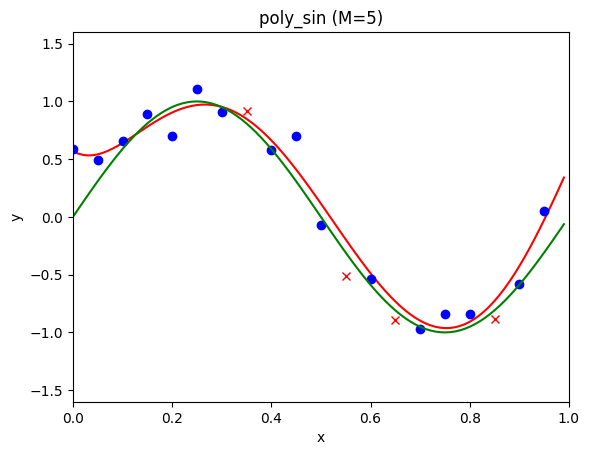

MSE= 0.039043631421603824
[ 1  2  3  5  6  7  8 11 12 13 14 15 16 17 18 19] [ 0  4  9 10]
[0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.49521235  0.65957713  0.88780448  1.10905886  0.90439173  0.91859941
  0.57541203 -0.51346776 -0.53384268 -0.89146159 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [  0.14584282   6.15068373   2.10615331 -73.10452377 106.56007796
 -41.42136191]


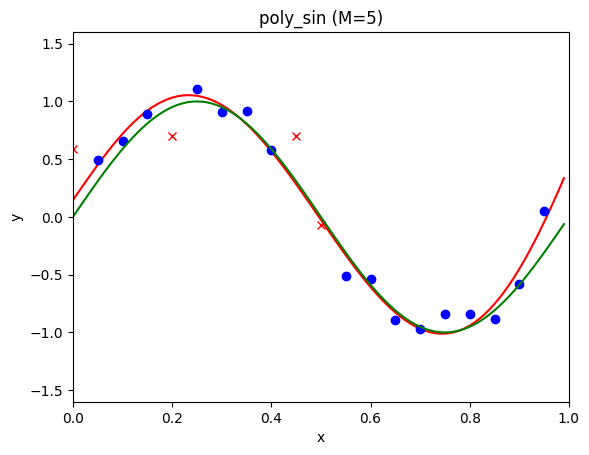

MSE= 0.12014853119509598
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 15 16 17] [ 3 14 18 19]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75
 0.8  0.85]
[ 0.58594295  0.49521235  0.65957713  0.70252468  1.10905886  0.90439173
  0.91859941  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268
 -0.89146159 -0.83637724 -0.84417242 -0.88324625]
W
 [   0.63440537   -7.4094829    92.61934138 -315.53534233  392.12113967
 -164.54270102]


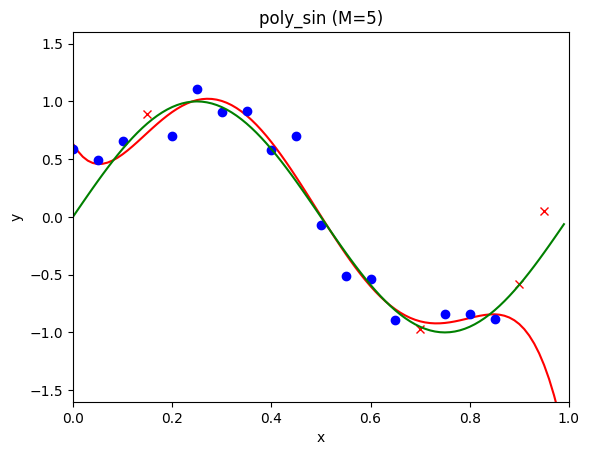

MSE= 0.47976183278262435
CV_MSE[5]=0.134912
[ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 17 19] [ 5 12 16 18]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75
 0.85 0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  0.90439173
  0.91859941  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.89146159
 -0.96941969 -0.83637724 -0.88324625  0.04714925]
W
 [   0.59625978   -4.33799763   64.79349148 -230.94112392  299.25773151
 -154.3767355    25.54665062]


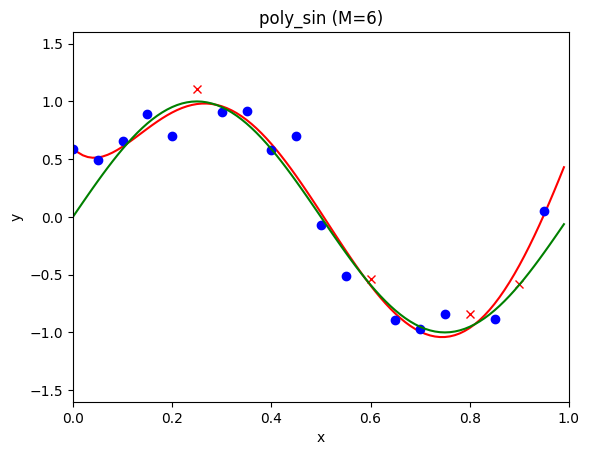

MSE= 0.015090396556049792
[ 0  1  3  4  5  6  7  8  9 10 11 12 16 17 18 19] [ 2 13 14 15]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.88780448  0.70252468  1.10905886  0.90439173
  0.91859941  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [   0.60420241   -6.21609339   87.89778413 -330.31711378  495.16613392
 -335.30393696   88.85033568]


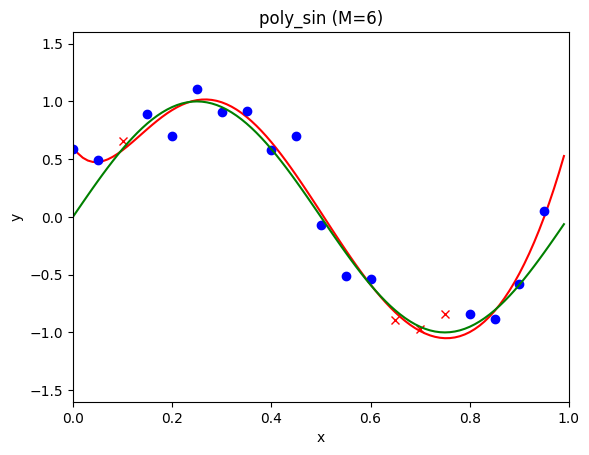

MSE= 0.014229832335250566
[ 0  1  2  3  4  5  8 10 11 12 13 14 15 16 17 18] [ 6  7  9 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.57541203 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.88324625 -0.58024514]
W
 [   0.59229822   -5.05102195   81.10625701 -321.62592602  489.8449137
 -320.5504819    75.25599867]


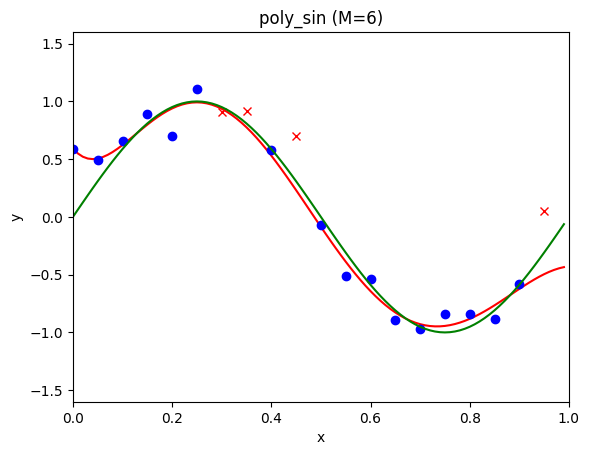

MSE= 0.13465823273786803
[ 0  1  2  4  5  6  7  8  9 12 13 14 15 16 18 19] [ 3 10 11 17]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.70252468  1.10905886  0.90439173
  0.91859941  0.57541203  0.70330329 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.58024514  0.04714925]
W
 [   0.59722794   -4.20004285   55.75241897 -171.96913921  165.24651285
  -25.64268768  -19.39538174]


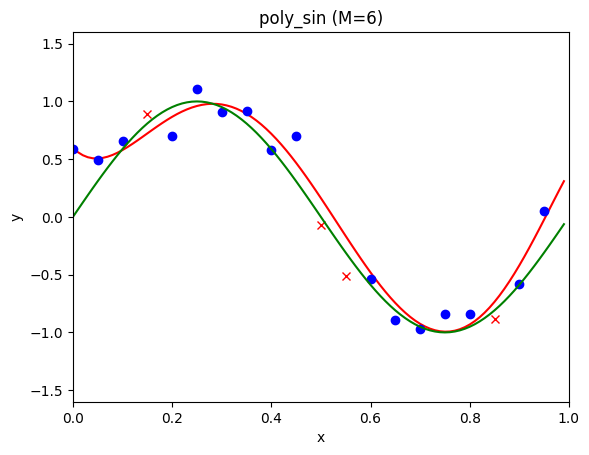

MSE= 0.05597087278218127
[ 2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [0 1 4 8]
[0.1  0.15 0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.65957713  0.88780448  1.10905886  0.90439173  0.91859941  0.70330329
 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [    1.95609386   -30.7469029    258.02508108  -887.95517561
  1419.86693025 -1084.78949883   324.5889005 ]


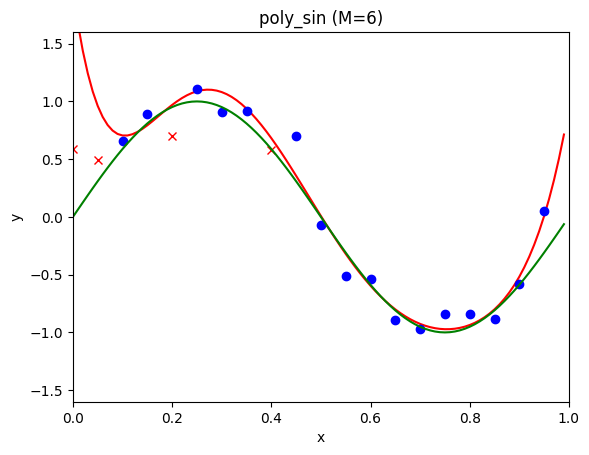

MSE= 0.5443150274183142
CV_MSE[6]=0.152853
[ 0  1  2  3  4  5  7  9 10 11 13 14 15 16 17 19] [ 6  8 12 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.91859941  0.70330329 -0.06880835 -0.51346776 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.88324625  0.04714925]
W
 [ 5.44541444e-01  5.28925310e+00 -1.16459859e+02  1.01291054e+03
 -3.65757449e+03  6.19643553e+03 -4.97464525e+03  1.53562781e+03]


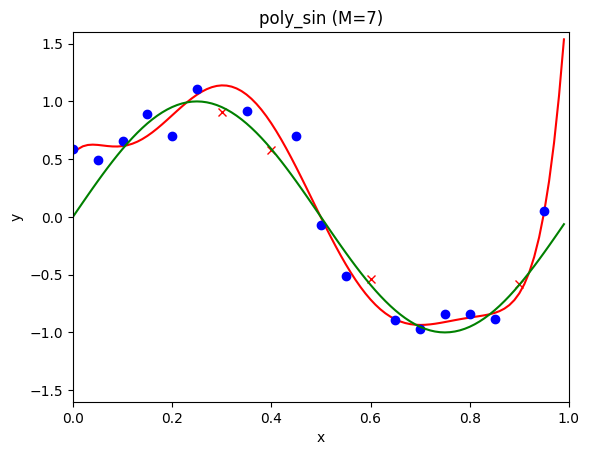

MSE= 0.037392810381366645
[ 0  2  3  4  6  7  8  9 10 11 12 13 16 17 18 19] [ 1  5 14 15]
[0.   0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.65957713  0.88780448  0.70252468  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.89146159
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 5.78465074e-01  1.12251711e+01 -1.87590712e+02  1.26725467e+03
 -3.99780544e+03  6.26248810e+03 -4.77548187e+03  1.42117211e+03]


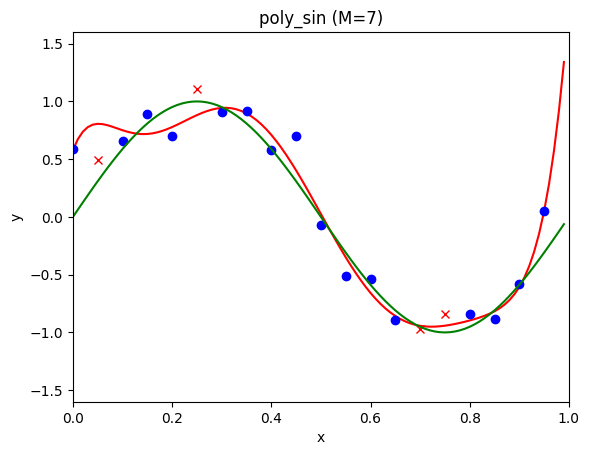

MSE= 0.04007733654646221
[ 1  2  4  5  6  7  8 10 11 12 13 14 15 17 18 19] [ 0  3  9 16]
[0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.49521235  0.65957713  0.70252468  1.10905886  0.90439173  0.91859941
  0.57541203 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [ 2.44917003e-01  9.43390185e+00 -1.17276116e+02  8.37157498e+02
 -2.87364381e+03  4.79883438e+03 -3.84025202e+03  1.18743196e+03]


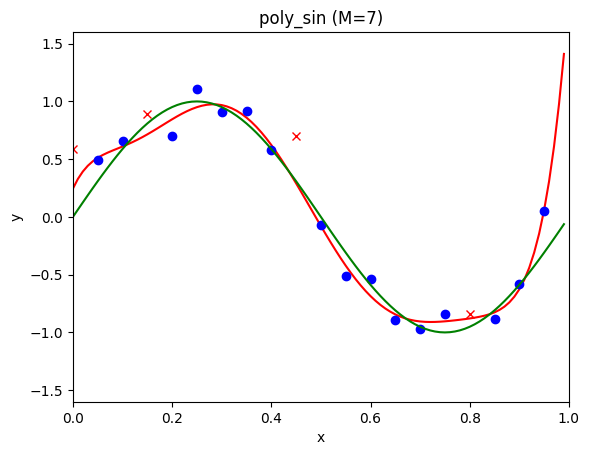

MSE= 0.07939797019930284
[ 0  1  2  3  5  6  7  8  9 12 14 15 16 17 18 19] [ 4 10 11 13]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  1.10905886  0.90439173
  0.91859941  0.57541203  0.70330329 -0.53384268 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 5.60646247e-01 -1.48022940e+00  3.05984284e+01 -3.21849520e+01
 -3.06836821e+02  8.40389527e+02 -8.00678360e+02  2.70737950e+02]


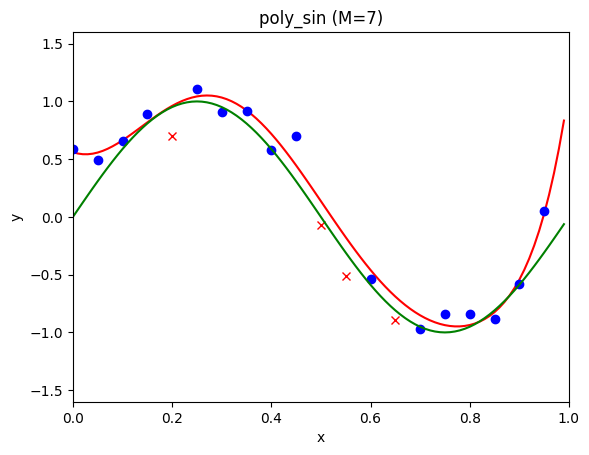

MSE= 0.06601417245199073
[ 0  1  3  4  5  6  8  9 10 11 12 13 14 15 16 18] [ 2  7 17 19]
[0.   0.05 0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.9 ]
[ 0.58594295  0.49521235  0.88780448  0.70252468  1.10905886  0.90439173
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.89146159
 -0.96941969 -0.83637724 -0.84417242 -0.58024514]
W
 [ 5.65979242e-01 -7.30981703e-01  4.33768582e+00  1.42488162e+02
 -7.69604438e+02  1.36992660e+03 -1.01551511e+03  2.67228711e+02]


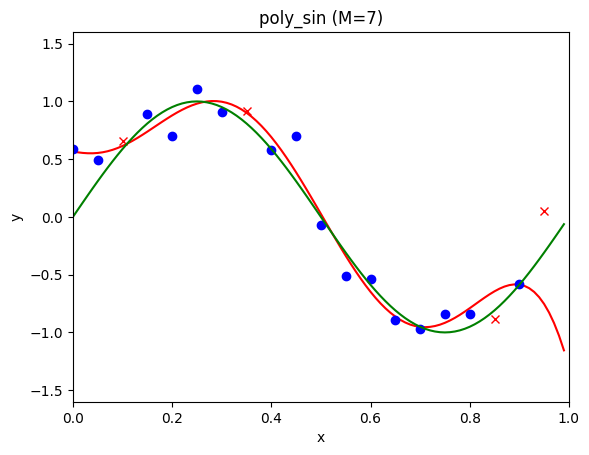

MSE= 0.17516965388275152
CV_MSE[7]=0.079610
[ 0  1  3  4  5  6  8 10 11 12 13 14 16 17 18 19] [ 2  7  9 15]
[0.   0.05 0.15 0.2  0.25 0.3  0.4  0.5  0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.88780448  0.70252468  1.10905886  0.90439173
  0.57541203 -0.06880835 -0.51346776 -0.53384268 -0.89146159 -0.96941969
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 5.79756472e-01 -4.05551235e+00  7.16864630e+01 -3.52169768e+02
  1.03646732e+03 -2.40944982e+03  3.66706086e+03 -2.93683306e+03
  9.28551141e+02]


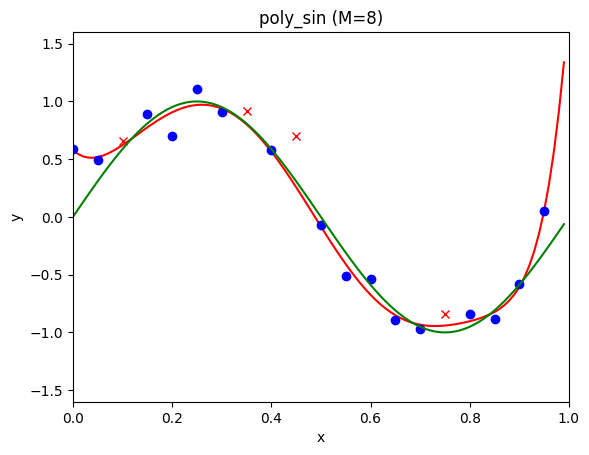

MSE= 0.05604709113891016
[ 0  1  2  3  4  5  6  7  9 12 13 14 15 16 17 18] [ 8 10 11 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  1.10905886
  0.90439173  0.91859941  0.70330329 -0.53384268 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.88324625 -0.58024514]
W
 [ 5.90406894e-01 -1.21275351e+01  3.04211453e+02 -2.65748818e+03
  1.17761796e+04 -2.87431458e+04  3.87272054e+04 -2.69472716e+04
  7.56014955e+03]


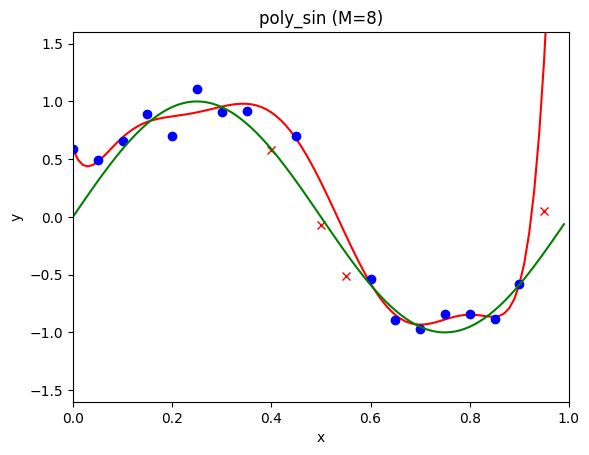

MSE= 0.5223585041939104
[ 1  2  3  5  6  7  8  9 10 11 12 14 15 16 18 19] [ 0  4 13 17]
[0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.9  0.95]
[ 0.49521235  0.65957713  0.88780448  1.10905886  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.96941969
 -0.83637724 -0.84417242 -0.58024514  0.04714925]
W
 [ 7.11666176e-01 -1.36608230e+01  2.61000272e+02 -1.84202431e+03
  6.99227746e+03 -1.55522837e+04  1.98449303e+04 -1.33311099e+04
  3.64270172e+03]


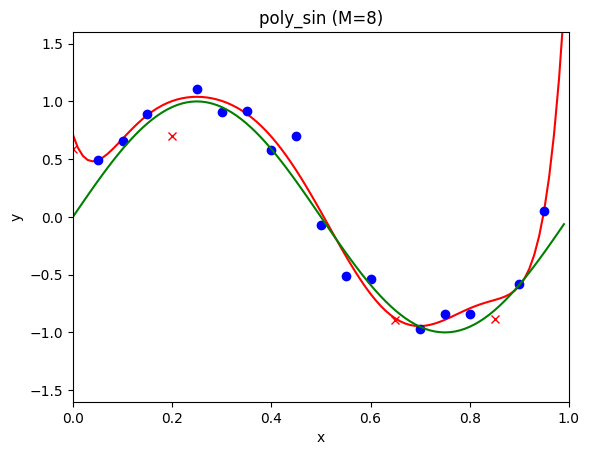

MSE= 0.03324863230985367
[ 0  2  4  5  6  7  8  9 10 11 12 13 15 17 18 19] [ 1  3 14 16]
[0.   0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.85
 0.9  0.95]
[ 0.58594295  0.65957713  0.70252468  1.10905886  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.89146159
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [ 5.86273010e-01  7.38553719e+00 -1.48557317e+02  1.14414761e+03
 -3.90657766e+03  6.49800632e+03 -5.28716829e+03  1.77729991e+03
 -8.31102007e+01]


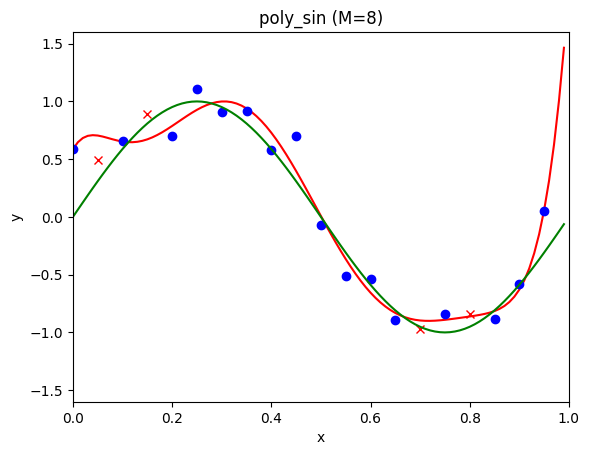

MSE= 0.02406579726077719
[ 0  1  2  3  4  7  8  9 10 11 13 14 15 16 17 19] [ 5  6 12 18]
[0.   0.05 0.1  0.15 0.2  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.70252468  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.89146159 -0.96941969
 -0.83637724 -0.84417242 -0.88324625  0.04714925]
W
 [ 5.77801041e-01 -8.47916160e+00  2.29128601e+02 -2.09842653e+03
  9.69559045e+03 -2.45352253e+04  3.40062459e+04 -2.41560602e+04
  6.87197766e+03]


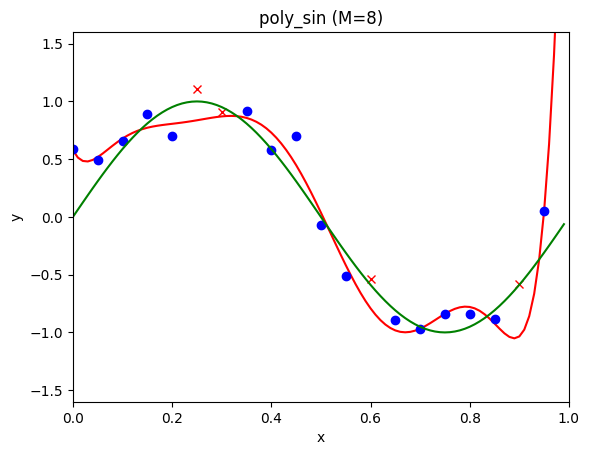

MSE= 0.08703799687065944
CV_MSE[8]=0.144552
[ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 19] [ 0 12 17 18]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75
 0.8  0.95]
[ 0.49521235  0.65957713  0.88780448  0.70252468  1.10905886  0.90439173
  0.91859941  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.89146159
 -0.96941969 -0.83637724 -0.84417242  0.04714925]
W
 [ 6.55397749e-01 -1.29997909e+01  2.98608535e+02 -2.57555670e+03
  1.16788778e+04 -2.99071828e+04  4.32486497e+04 -3.36680123e+04
  1.21410158e+04 -1.19817103e+03]


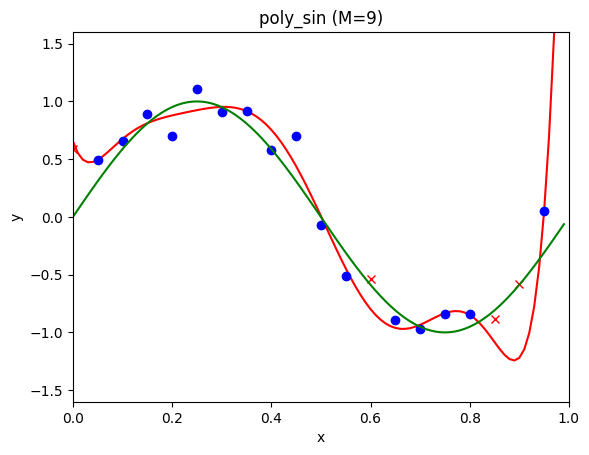

MSE= 0.13096257024310154
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 16 17 18] [ 4  5 15 19]
[0.   0.05 0.1  0.15 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.8
 0.85 0.9 ]
[ 0.58594295  0.49521235  0.65957713  0.88780448  0.90439173  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.89146159
 -0.96941969 -0.84417242 -0.88324625 -0.58024514]
W
 [ 5.89673939e-01 -1.34146595e+01  3.47103999e+02 -3.16132407e+03
  1.49337325e+04 -4.02715080e+04  6.32914703e+04 -5.67833849e+04
  2.66559927e+04 -4.99365078e+03]


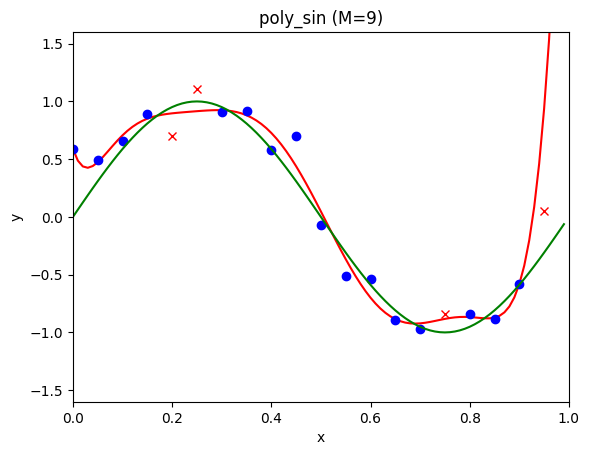

MSE= 0.2168355381059321
[ 0  1  3  4  5  6  7  8 10 12 13 15 16 17 18 19] [ 2  9 11 14]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.88780448  0.70252468  1.10905886  0.90439173
  0.91859941  0.57541203 -0.06880835 -0.53384268 -0.89146159 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 5.82292918e-01 -7.61526635e+00  1.91108797e+02 -1.73183062e+03
  8.79104281e+03 -2.65436802e+04  4.74162645e+04 -4.88974261e+04
  2.68602265e+04 -6.07751313e+03]


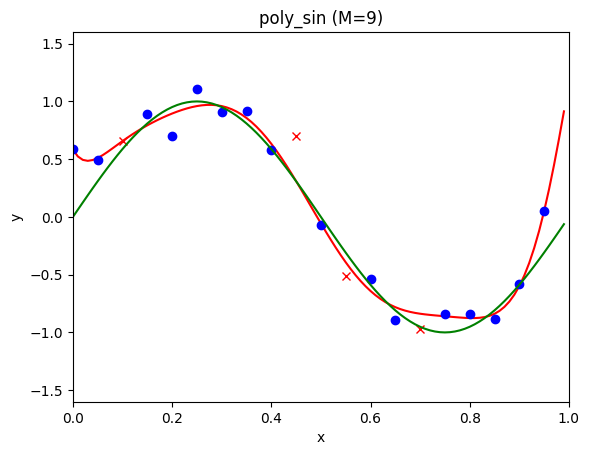

MSE= 0.04665573557788806
[ 0  2  3  4  5  7  8  9 10 11 12 14 15 17 18 19] [ 1  6 13 16]
[0.   0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.85
 0.9  0.95]
[ 0.58594295  0.65957713  0.88780448  0.70252468  1.10905886  0.91859941
  0.57541203  0.70330329 -0.06880835 -0.51346776 -0.53384268 -0.96941969
 -0.83637724 -0.88324625 -0.58024514  0.04714925]
W
 [ 5.85627684e-01 -1.12634868e+01  3.01974131e+02 -2.95045182e+03
  1.53507573e+04 -4.60226992e+04  8.10105165e+04 -8.24755477e+04
  4.49276607e+04 -1.01307118e+04]


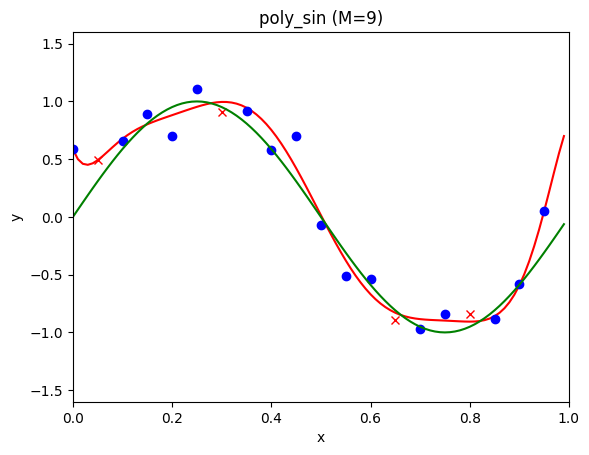

MSE= 0.004006980048571829
[ 0  1  2  4  5  6  9 11 12 13 14 15 16 17 18 19] [ 3  7  8 10]
[0.   0.05 0.1  0.2  0.25 0.3  0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.58594295  0.49521235  0.65957713  0.70252468  1.10905886  0.90439173
  0.70330329 -0.51346776 -0.53384268 -0.89146159 -0.96941969 -0.83637724
 -0.84417242 -0.88324625 -0.58024514  0.04714925]
W
 [ 5.86860265e-01 -1.22994565e+01  3.52543746e+02 -3.76844563e+03
  2.07674790e+04 -6.39967907e+04  1.13919280e+05 -1.16360064e+05
  6.33490268e+04 -1.42505515e+04]


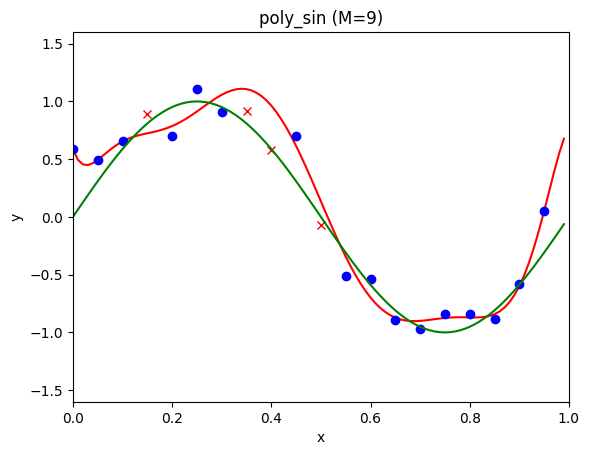

MSE= 0.06357234128642883
CV_MSE[9]=0.092407


In [5]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]
n_fold = 5

CV_MSE = np.zeros(len(search_range))

for M in search_range:

  kf = KFold(n_splits=n_fold, shuffle=True)
  for train_indx, test_indx in kf.split(x_train):
    print("%s %s" % (train_indx, test_indx))
    x_train_cv = x_train[train_indx]
    y_train_cv = y_train[train_indx]
    x_test_cv = x_train[test_indx]
    y_test_cv = y_train[test_indx]

    print(x_train_cv)
    print(y_train_cv)

    W = E(x_train_cv, y_train_cv, M)
    print('W\n', W)

    y_estimate_cv = [y(x, W, M) for x in x_test_cv]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train_cv, y_train_cv, 'bo')
    plt.plot(x_test_cv, y_test_cv, 'rx')
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_test_cv - y_estimate_cv)).mean()
    print('MSE=', mse)

    CV_MSE[M] += mse

  CV_MSE[M]=CV_MSE[M]/n_fold

  print('CV_MSE[%d]=%f'% (M, CV_MSE[M]))



CV_MSE
 [0.56618409 0.24956028 0.29383175 0.07630864 0.08948463 0.1349122
 0.15285287 0.07961039 0.1445516  0.09240663]
The best order of the model is 4


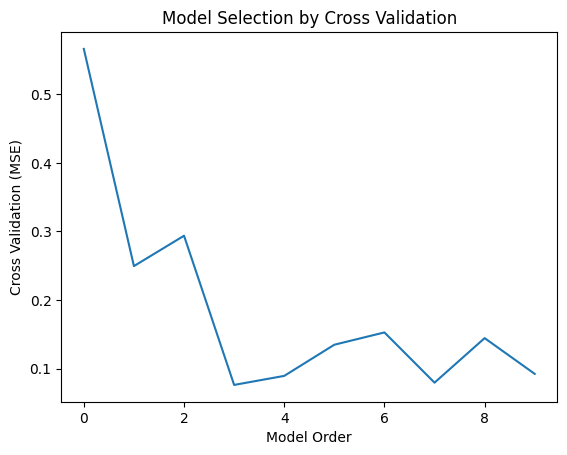

In [6]:
print('CV_MSE\n', CV_MSE)
print('The best order of the model is %d' % (np.argmin(CV_MSE)+1))

plt.plot(CV_MSE)
plt.title("Model Selection by Cross Validation")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_cvMSE.eps')
plt.show()
plt.close()
